In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [194]:
x, y = make_blobs(n_samples=1000, n_features = 2, centers = 5, random_state=10)

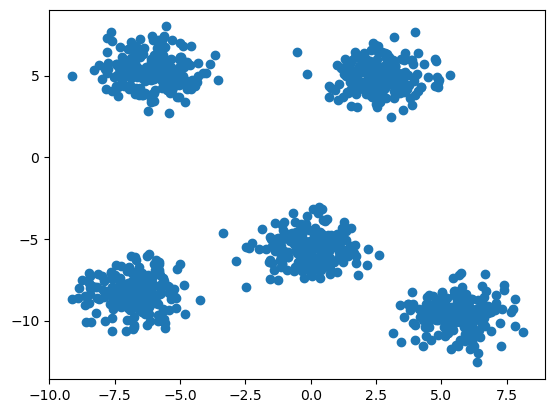

In [196]:
plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [120]:
k = 5
colors = ["green","blue","red","yellow","gray"]
clusters={}
#1:to initialzie cluster
for each_cluster in range(k):
    center = 10*(2*np.random.random((x.shape[1],))-1)
    points = []
    cluster = {'center' : center,
               'points' : points,
               'color' :colors[each_cluster]
              }
    clusters[each_cluster] = cluster
    

In [121]:
clusters

{0: {'center': array([ 8.69177901, -5.34802436]),
  'points': [],
  'color': 'green'},
 1: {'center': array([8.95305874, 9.67047622]), 'points': [], 'color': 'blue'},
 2: {'center': array([ 9.57046198, -7.10358594]),
  'points': [],
  'color': 'red'},
 3: {'center': array([ 7.19716315, -4.55982328]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([-0.55979824,  0.66161206]),
  'points': [],
  'color': 'gray'}}

In [122]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1,v2))**2)

In [123]:
def assignPointstoclusters(clusters):
  
    for every_data_point in range(x.shape[0]):
        dist = []
        current_x = x[every_data_point]
        for kx in range(k):
            d = distance(current_x, clusters[kx]['center'])
            dist.append(d)
        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(x[every_data_point])

In [124]:
def updatecluster(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        if pts.shape[0] > 0:
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = []

In [227]:
def plotclusters(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        if pts.shape[0] > 0:
            plt.scatter(pts[:,0], pts[:, 1],color = clusters[kx]['color'])
        plt.scatter(clusters[kx]['center'][0], clusters[kx]['center'][1], color ='black', marker = '*') 

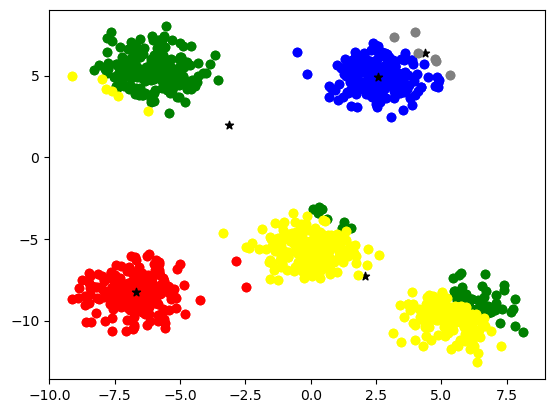

In [229]:
assignPointstoclusters(clusters)
plotclusters(clusters)
updatecluster(clusters)

In [231]:
from sklearn.datasets import make_moons

In [251]:
a, b = make_moons(n_samples = 200, noise = 0.10)

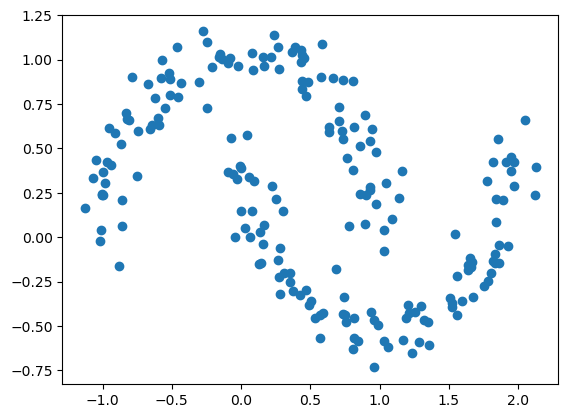

In [283]:
plt.scatter(a[:, 0],a[:, 1])
plt.show()

In [285]:
from sklearn.cluster import KMeans

In [287]:
km = KMeans(n_clusters=2)

In [289]:
km.fit(a)

C:\Users\Bharath Kumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [291]:
centers = km.cluster_centers_
label = km.labels_

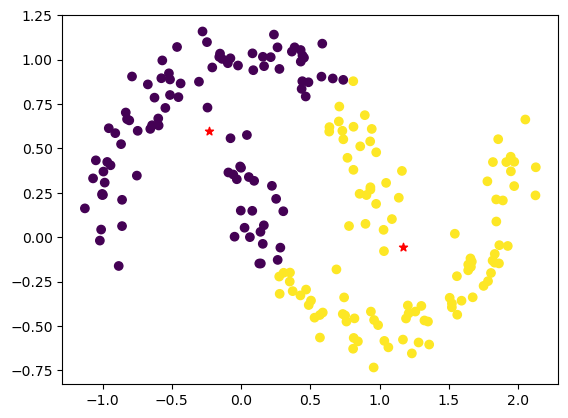

In [295]:
plt.scatter(a[:,0],a[:,1], c= label)
plt.scatter(centers[:, 0],centers[:, 1], color = 'red', marker = '*')